Scores:
[0.61       0.64       0.53       0.51       0.43       0.42
 0.36       0.42       0.77       0.73       0.64       0.71
 0.71       0.85       0.66       0.65       0.82       0.56
 0.7        0.70707071 0.72727273 0.62626263 0.45454545 0.41414141
 0.35353535 0.71717172 0.71717172 0.71717172 0.64646465 0.74747475
 0.68686869 0.71717172 0.42424242 0.32323232 0.60606061 0.76767677
 0.70707071 0.68686869 0.62626263 0.49494949 0.58585859 0.72727273]


Predictions:
[2 1 2 ... 2 2 3]


Confusion Matrix:
[[ 668  169    2]
 [ 276 1656  446]
 [  35  673  252]]
Total misclassification errors:
1601


Accuracy:
61.67105578166148%
[[ 668  169    2]
 [ 276 1656  446]
 [  35  673  252]]


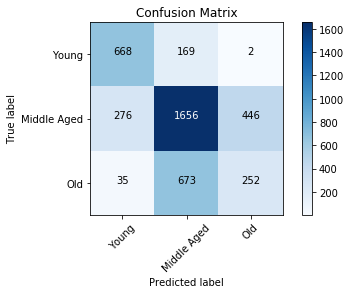


*************

Scores:
[0.44019139 0.58253589 0.58802395 0.63233533 0.59760479]


Predictions:
[2 1 2 ... 3 2 3]


Confusion Matrix:
[[ 665  170    4]
 [ 279 1486  613]
 [  36  702  222]]
Total misclassification errors:
1804


Accuracy:
56.81110845104141%
[[ 665  170    4]
 [ 279 1486  613]
 [  36  702  222]]


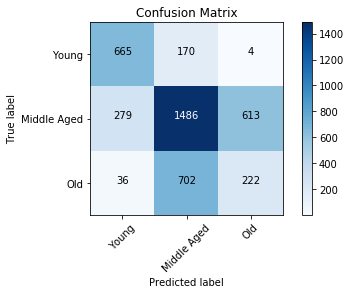


*************

Scores:
[0.63       0.66       0.58       0.63       0.51       0.44
 0.35       0.39       0.61       0.78       0.49       0.57
 0.6        0.65       0.63       0.5        0.7        0.47
 0.64       0.56565657 0.65656566 0.5959596  0.63636364 0.44444444
 0.35353535 0.62626263 0.55555556 0.64646465 0.55555556 0.61616162
 0.51515152 0.64646465 0.50505051 0.31313131 0.5959596  0.5959596
 0.52525253 0.52525253 0.55555556 0.50505051 0.54545455 0.5959596 ]


Predictions:
[1 1 2 ... 3 3 3]


Confusion Matrix:
[[ 737   97    5]
 [ 473 1138  767]
 [  68  429  463]]
Total misclassification errors:
1839


Accuracy:
55.97318649748624%
[[ 737   97    5]
 [ 473 1138  767]
 [  68  429  463]]


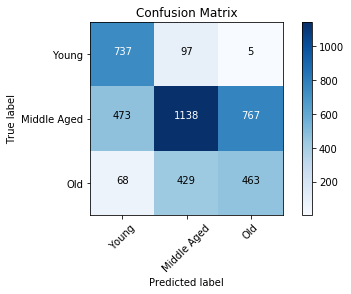


*************

Scores:
[0.4784689  0.57177033 0.55329341 0.57365269 0.53293413]


Predictions:
[1 1 2 ... 3 3 3]


Confusion Matrix:
[[ 734   96    9]
 [ 473 1098  807]
 [  70  458  432]]
Total misclassification errors:
1913


Accuracy:
54.201580081398134%
[[ 734   96    9]
 [ 473 1098  807]
 [  70  458  432]]


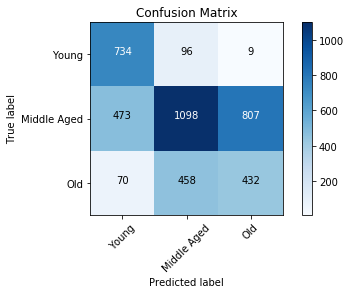


*************



In [11]:

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix
import math
import numpy as np
import matplotlib.pyplot as plt
import itertools

class Homework(object):
    def __init__(self):
        self.dataset = {}

        self.run()

    def load_data(self):
        with open(r"C:\Users\90536\Downloads\hw1 (1)\abalone_dataset.txt", "r") as f:
            for i, line in enumerate(f.readlines()):
                line = line.strip()
                line = line.split("\t")
                sex, length, diameter, height, whole_weight, shucked_weight, viscera_weight, shell_weight, classified = line

                if sex == "M":
                    sex = 1
                elif sex == "F":
                    sex = 2
                elif sex == "I":
                    sex = 3

                self.dataset[i] = {
                    "sex": int(sex),
                    "length": float(length),
                    "diameter": float(diameter),
                    "height": float(height),
                    "whole weight": float(whole_weight),
                    "shucked weight": float(shucked_weight),
                    "viscera weight": float(viscera_weight),
                    "shell weight": float(shell_weight),
                    "classified": int(classified)
                }

    def features(self, *keys):
        temp_dataset = []
        for i, data in self.dataset.items():
            temp_data = []

            if "all" in keys:
                for key, value in data.items():
                    if key == "classified":
                        continue

                    temp_data.append(value)

            else:
                for key in keys:
                    temp_data.append(data[key])

            temp_dataset.append(temp_data)

        return temp_dataset

    def naive_bayes_classification(self, training_sample_numbers, *features):
        gaussian = GaussianNB()
        features = self.features(*features)
        y = np.ravel(self.features("classified"))

        kF = KFold(n_splits= math.ceil(len(self.dataset) / training_sample_numbers))

        scores = cross_val_score(gaussian, features, y, cv= kF)

        y_predicts = cross_val_predict(gaussian, features, y, cv=kF)

        c_matrix = confusion_matrix(y, y_predicts)

        print("Scores:")
        print(scores)
        print("\n")
        print("Predictions:")
        print(y_predicts)
        print("\n")
        print("Confusion Matrix:")
        print(c_matrix)

        print("Total misclassification errors:")
        classification_errors = c_matrix[0][1]  + c_matrix[0][2] + c_matrix[1][0] + c_matrix[1][2] + c_matrix[2][0] + c_matrix[2][1]
        print(classification_errors)

        print("\n")
        print("Accuracy:")
        accuracy = ((c_matrix[0][0] + c_matrix[1][1] + c_matrix[2][2]) / (len(self.dataset))) * 100
        print("%s%%" % accuracy)

        plt.figure()
        self.plot_confusion_matrix(c_matrix, classes=["Young", "Middle Aged", "Old"],
                              title='Confusion Matrix')
        plt.show()
        print("\n*************\n")

    def run(self):
        self.load_data()
        self.naive_bayes_classification(100, "sex", "length", "diameter")
        self.naive_bayes_classification(1000, "sex", "length", "diameter")
        self.naive_bayes_classification(100, "all")
        self.naive_bayes_classification(1000, "all")

    def plot_confusion_matrix(self, cm, classes,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):

        print(cm)

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')



Homework()


NameError: name 'self' is not defined